In [1]:
# Classifying bearings with a Convolutional Neural Network using TensorFlow, CV2
# https://www.kaggle.com/stevenhurwitt/cats-vs-dogs-using-a-keras-convnet
'''
These are the steps need to follow while writing Tensorflow:

Step 1) Import the necessary pacakges and data
Step 2) Transform the data
Step 3) Construct the tensor
Step 4) Build the model
Step 5) Train and evaluate the model
Step 6) Improve the mode

-install Keras first time, import pandas, numpy 

-Import all libraries as below

-Import Numpy. If it is first time, we can pip install

-Import os and matplotlib

-progress bars to Python code is with tqdm. Install it and import.

'''

import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras import backend as K
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
from datetime import datetime
start=datetime.now()
start

datetime.datetime(2019, 8, 3, 22, 15, 41, 616235)

In [3]:
import os
cwd = os.getcwd()
os.chdir("E:/IIM/TensorFlow/warranty/Bearings/")
cwd

'C:\\Users\\Eshwar'

In [4]:
'''
TensorFlow Fold makes it easy to implement deep-learning models that operate over data of varying size and structure

Firsr, change the working directory where we have the images for input.

1. create image folders for test and train.
2. If not in the desired, change/set the working directory to that path as below where the image files exists.
'''

os.chdir("E:/IIM/TensorFlow/warranty/Bearings/")
cwd

'C:\\Users\\Eshwar'

In [5]:
'''
Set Path to test directory
Set path to train directory
'''

TEST_DIR  = "E:/IIM/TensorFlow/warranty/Bearings/test"
TRAIN_DIR  = "E:/IIM/TensorFlow/warranty/Bearings/train"

In [6]:
ROWS = 256
COLS = 256
ROWS2 = 64
COLS2 = 64
CHANNELS = 3

In [7]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_guds =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'gud' in i]
train_bads =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'bad' in i]

In [8]:
train_images[1]

'E:/IIM/TensorFlow/warranty/Bearings/trainbad.10.JPG'

In [9]:
train_guds[1]

'E:/IIM/TensorFlow/warranty/Bearings/traingud.10.JPG'

In [10]:
train_bads[0]

'E:/IIM/TensorFlow/warranty/Bearings/trainbad.1.JPG'

In [11]:
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [12]:
test_images[0]

'E:/IIM/TensorFlow/warranty/Bearings/test1.JPG'

In [13]:
len(os.listdir(TRAIN_DIR))

478

In [14]:
len(os.listdir(TEST_DIR))

28

In [15]:
# slice datasets for test and training

train_images = train_guds[:197] + train_bads[:281]
random.shuffle(train_images)
test_images =  test_images[:28]

In [16]:
len(train_bads)

281

In [17]:
len(train_images)

478

In [18]:
from tqdm import tqdm
from random import shuffle
IMG_SIZE = 50

In [19]:
'''
define the classification label to convert the lable into one-hot array as below
'''
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [gud,bad]
    #                            [much gud, no bad]
    if word_label == 'gud': return [1,0]
    #                             [no gud, very bad]
    elif word_label == 'bad': return [0,1]

In [20]:
'''
Create training data and save it in train_data.npy in the working directory.
Convert the image as gray scale image
This data can be used in the subsequent steps as needed

'''

def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [21]:
'''
Create test data and save it in train_data.npy in the working directory.
Convert the image as gray scale image
This data can be used in the subsequent steps as needed

'''
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [25]:
train_images[0]

'E:/IIM/TensorFlow/warranty/Bearings/traingud.73.JPG'

In [30]:
train = create_train_data()
# If we have already created the dataset:
#train_data = np.load('train_data.npy')

100%|██████████| 478/478 [00:00<00:00, 691.28it/s]


In [31]:
test = process_test_data()
# If we have already created the dataset:
#train_data = np.load('train_data.npy')

100%|██████████| 28/28 [00:00<00:00, 772.29it/s]


In [32]:
test2 = process_test_data()
# If we have already created the dataset:
#train_data = np.load('train_data.npy')

100%|██████████| 28/28 [00:00<00:00, 990.55it/s]


In [33]:
train[1]

[array([[ 63, 159, 165, ..., 178, 182, 183],
        [ 88, 167, 160, ..., 179, 180, 181],
        [115, 173, 155, ..., 176, 176, 178],
        ...,
        [176, 173, 177, ..., 140, 131,  61],
        [172, 172, 169, ..., 129, 118,  57],
        [169, 175, 169, ..., 127, 107,  60]], dtype=uint8), array([0, 1])]

In [34]:
train = train.reshape(3,64,64)

AttributeError: 'list' object has no attribute 'reshape'

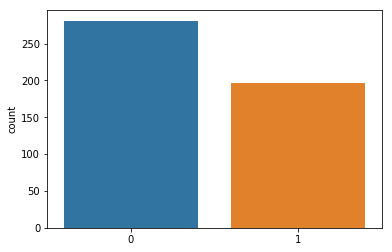

In [35]:
labels = []
for i in train_images:
    if 'gud' in i:
        labels.append(1)
    else:
        labels.append(0)
sns.countplot(labels)

In [26]:
train_bads[1]

'E:/IIM/TensorFlow/warranty/Bearings/trainbad.10.JPG'

In [48]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

Instructions for updating:
Colocations handled automatically by placer.


In [50]:
train.shape[1:]

AttributeError: 'list' object has no attribute 'shape'

In [49]:
def catdog():
    
    model = Sequential()

    model.add(Conv2D(32, 3, padding='same', input_shape=train.shape[1:], activation='relu'))
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    #print("First layer...")
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    #print("Second layer...")
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    #print("Third layer...")
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

    #model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #print("Flattening, etc...")
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    print("Compiling model...")
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

print("Creating model:")
model = catdog()

Creating model:


AttributeError: 'list' object has no attribute 'shape'